# Analysis


In [ ]:
#| default_exp playground

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
import requests
import seaborn as sns

In [ ]:

def get_firebase_data():
    url = 'https://bettersimon-70387-default-rtdb.europe-west1.firebasedatabase.app/.json'
    response = requests.get(url)
    if response.ok:
        return response.json()
    else:
        return None

data = get_firebase_data()

df = pd.DataFrame([(key, *i.values()) for key, val in data.items() for i in val],
                  columns=['participant', 'accuracy', 'congruent', 'rt'])
df["trial_number"] = df.groupby("participant").cumcount() + 1

In [ ]:
df.groupby(['participant','congruent']).accuracy.mean()

participant  congruent
kga1fh       False        1.0
             True         1.0
ksfnf4       False        1.0
             True         1.0
Name: accuracy, dtype: float64

In [ ]:
mean_rts = pd.DataFrame(df.query("accuracy==True").groupby(['participant','congruent']).rt.mean()).reset_index()
mean_rts

,participant,congruent,rt
0,kga1fh,False,1526.300000
1,kga1fh,True,1392.000000
2,ksfnf4,False,1516.454545
3,ksfnf4,True,1411.222222


<Axes: xlabel='congruent', ylabel='rt'>

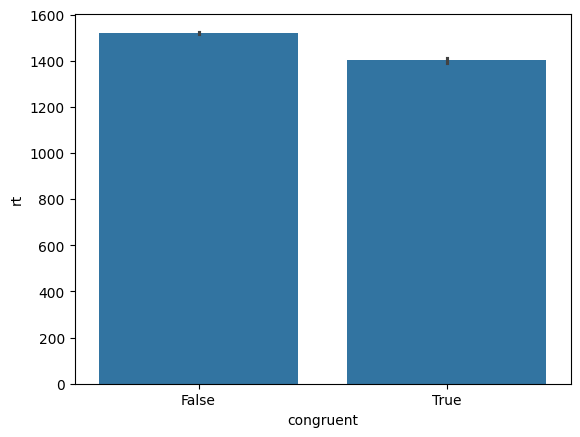

In [ ]:
sns.barplot(x = 'congruent', y = 'rt', data = mean_rts)